In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Dataset root
DATASET_ROOT = "/content/drive/My Drive/Goslar_dataset_split"

TRAIN_DIR = os.path.join(DATASET_ROOT, "train")
VAL_DIR   = os.path.join(DATASET_ROOT, "val")
TEST_DIR  = os.path.join(DATASET_ROOT, "test")

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 25
NUM_CLASSES = 4
SEED = 42


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

val_generator = test_val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = test_val_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)


Found 1920 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Classes: ['0', '1', '2', '3']


In [ ]:
# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(64, (3,3), activation="relu"),
#     layers.MaxPooling2D(2,2),

#     layers.Conv2D(128, (3,3), activation="relu"),
#     layers.MaxPooling2D(2,2),

#     layers.Flatten(),
#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.3),
#     layers.Dense(256, activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(NUM_CLASSES, activation="softmax")
# ])

# model.compile(
#     optimizer=Adam(learning_rate=1e-4),
#     loss="categorical_crossentropy",
#     metrics=["accuracy"]
# )

# model.summary()


In [ ]:
IMG_SIZE = (128, 128, 3)

model = models.Sequential([

    # -------- BLOCK 1 --------
    layers.Conv2D(32, (3,3), padding="same", input_shape=IMG_SIZE),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),

    # -------- BLOCK 2 --------
    layers.Conv2D(64, (3,3), padding="same"),
    #layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),

    # -------- BLOCK 3 --------
    layers.Conv2D(128, (3,3), padding="same"),
    #layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(2,2),


    layers.Flatten(),


    # -------- CLASSIFIER --------
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(128, activation="relu"),
    #layers.Dropout(0.3),

    layers.Dense(NUM_CLASSES, activation="softmax")
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,515,652 (32.48 MB)

 Trainable params: 8,515,588 (32.48 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, checkpoint]


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,                 # large number (EarlyStopping decides actual stop)
    callbacks=callbacks
)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2844 - loss: 1.4781
Epoch 1: val_loss improved from inf to 1.37021, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.2852 - loss: 1.4765 - val_accuracy: 0.2958 - val_loss: 1.3702
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4592 - loss: 1.2087
Epoch 2: val_loss improved from 1.37021 to 1.32689, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4596 - loss: 1.2081 - val_accuracy: 0.4208 - val_loss: 1.3269
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5146 - loss: 1.1341
Epoch 3: val_loss improved from 1.32689 to 1.29017, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5147 - loss: 1.1337 - val_accuracy: 0.4125 - val_loss: 1.2902
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5326 - loss: 1.0656
Epoch 4: val_loss improved from 1.29017 to 1.24650, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.5327 - loss: 1.0656 - val_accuracy: 0.5083 - val_loss: 1.2465
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5559 - loss: 1.0379
Epoch 5: val_loss improved from 1.24650 to 1.20342, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5557 - loss: 1.0381 - val_accuracy: 0.6083 - val_loss: 1.2034
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5374 - loss: 1.0685
Epoch 6: val_loss improved from 1.20342 to 1.13394, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5379 - loss: 1.0677 - val_accuracy: 0.5792 - val_loss: 1.1339
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5816 - loss: 1.0050
Epoch 7: val_loss improved from 1.13394 to 1.07866, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5814 - loss: 1.0051 - val_accuracy: 0.6083 - val_loss: 1.0787
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5878 - loss: 0.9912
Epoch 8: val_loss improved from 1.07866 to 0.98167, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5881 - loss: 0.9906 - val_accuracy: 0.6167 - val_loss: 0.9817
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6312 - loss: 0.9227
Epoch 9: val_loss improved from 0.98167 to 0.95992, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6312 - loss: 0.9226 - val_accuracy: 0.6292 - val_loss: 0.9599
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6226 - loss: 0.9093
Epoch 10: val_loss improved from 0.95992 to 0.93896, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.6226 - loss: 0.9096 - val_accuracy: 0.6292 - val_loss: 0.9390
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6204 - loss: 0.9006
Epoch 11: val_loss did not improve from 0.93896
60/60 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.6204 - loss: 0.9008 - val_accuracy: 0.6167 - val_loss: 0.9490
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6146 - loss: 0.8905
Epoch 12: val_loss improved from 0.93896 to 0.87444, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.6148 - loss: 0.8906 - val_accuracy: 0.6125 - val_loss: 0.8744
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6435 - loss: 0.8601
Epoch 13: val_loss did not improve from 0.87444
60/60 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6435 - loss: 0.8601 - val_accuracy: 0.6083 - val_loss: 0.8857
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6474 - loss: 0.8719
Epoch 14: val_loss did not improve from 0.87444
60/60 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6473 - loss: 0.8717 - val_accuracy: 0.6292 - val_loss: 0.8925
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6540 - loss: 0.8286
Epoch 15: val_loss improved from 0.87444 to 0.82923, saving model to best_model.h5


60/60 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6539 - loss: 0.8287 - val_accuracy: 0.6500 - val_loss: 0.8292
Epoch 16/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6672 - loss: 0.8220
Epoch 16: val_loss did not improve from 0.82923
60/60 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.6670 - loss: 0.8221 - val_accuracy: 0.6083 - val_loss: 0.9200
Epoch 17/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6871 - loss: 0.7898
Epoch 17: val_loss did not improve from 0.82923
60/60 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6868 - loss: 0.7903 - val_accuracy: 0.5875 - val_loss: 0.9435
Epoch 18/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6547 - loss: 0.8342
Epoch 18: val_loss did not improve from 0.82923
60/60 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6548 - loss: 0.8341 - val_accuracy: 0.6250 - val_loss: 0.8778
Epoch 19/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6652 - loss: 0.8243
Epoch 19: val_loss did not improve from 0.82923
60/60 ━━

In [ ]:
loss, acc = model.evaluate(test_generator)
print("Test accuracy:", acc)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.6613 - loss: 0.8448
Test accuracy: 0.6499999761581421


In [ ]:
def evaluate_model(generator, split_name):
    generator.reset()

    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n📊 {split_name.upper()} RESULTS")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(
        y_true,
        y_pred,
        target_names=class_names,
        digits=4
    ))


In [ ]:
evaluate_model(test_generator, "Test")

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step

📊 TEST RESULTS
Accuracy: 0.65
              precision    recall  f1-score   support

           0     0.6212    0.6833    0.6508        60
           1     0.5972    0.7167    0.6515        60
           2     0.6458    0.5167    0.5741        60
           3     0.7593    0.6833    0.7193        60

    accuracy                         0.6500       240
   macro avg     0.6559    0.6500    0.6489       240
weighted avg     0.6559    0.6500    0.6489       240



Text(0.5, 0, '# of epochs')

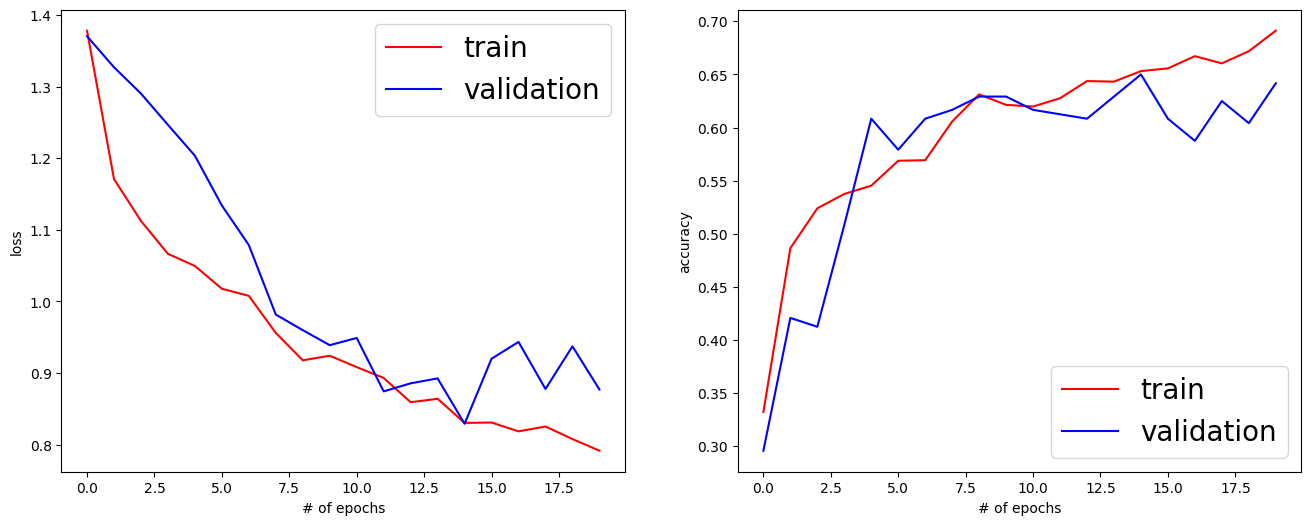

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(model, generator, class_names, title):
    """
    Plots confusion matrix for a given data generator
    """
    generator.reset()

    # Ground truth & predictions
    y_true = generator.classes
    y_pred_probs = model.predict(generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(7, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step


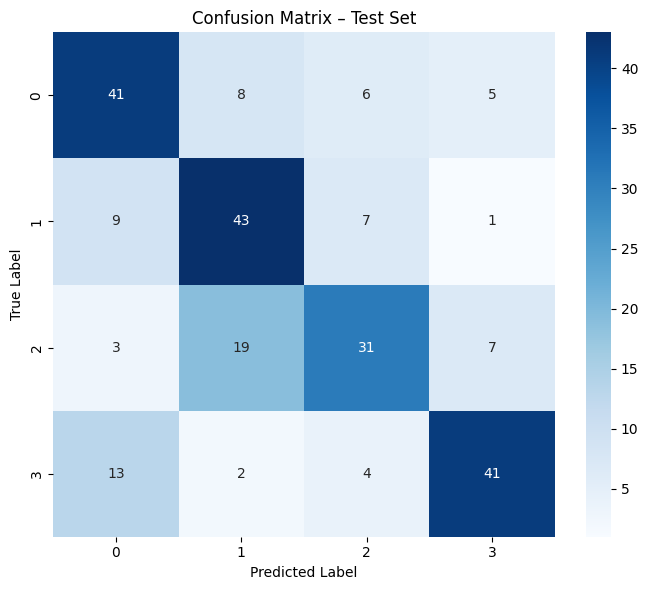

In [ ]:
plot_confusion_matrix(
    model,
    test_generator,
    class_names,
    title="Confusion Matrix – Test Set"
)
